In [3]:
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebookº
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Carga de información

In [5]:
laliga2122 = pd.read_excel('LaLiga21 22.xlsx', )
laliga2021 = pd.read_excel('LaLiga20 21.xlsx', )
laliga1920 = pd.read_excel('LaLiga19 20.xlsx', )
laliga1819 = pd.read_excel('LaLiga18 19.xlsx', )
laliga1718 = pd.read_excel('LaLiga17 18.xlsx', )
laliga1617 = pd.read_excel('LaLiga16 17.xlsx', )

## Creando dataframes

In [7]:
laliga = pd.concat([
    laliga2122.dropna(how='all'),
    laliga2021.dropna(how='all'),
    laliga1920.dropna(how='all'),
    laliga1819.dropna(how='all'),
    laliga1718.dropna(how='all'),
    laliga1617.dropna(how='all')
], ignore_index=True)


laliga['Attendance']= laliga['Attendance']*1000
laliga['Torneo'] = 'Primera división'

In [9]:
partidos6t = pd.concat([laliga],axis = 0)
partidos6t

,Wk,Day,Date,Time,Local,xG,Score,xG.1,Visitante,Attendance,Venue,Referee,Informe del partido,Notes,Torneo
0,1.0,Vie,2021-08-13,21:00 (15:00),Valencia,1.3,1–0,1.2,Getafe,9868.0,Estadio de Mestalla,Jesús Gil,Informe del partido,NaN,Primera división
1,1.0,Sáb,2021-08-14,19:30 (13:30),Cádiz,0.4,1–1,1.0,Levante,6941.0,Estadio Nuevo Mirandilla,Santiago Jaime,Informe del partido,NaN,Primera división
2,1.0,Sáb,2021-08-14,19:30 (13:30),Mallorca,0.4,1–1,0.9,Betis,6279.0,Iberostar Estadi,Antonio Matéu Lahoz,Informe del partido,NaN,Primera división
3,1.0,Sáb,2021-08-14,22:00 (16:00),Osasuna,0.8,0–0,0.7,Espanyol,6715.0,Estadio El Sadar,Miguel Ángel Ortiz Arias,Informe del partido,NaN,Primera división
4,1.0,Sáb,2021-08-14,22:00 (16:00),Alavés,1.7,1–4,1.8,Real Madrid,3968.0,Estadio de Mendizorroza,César Soto,Informe del partido,NaN,Primera división
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,38.0,Dom,2017-05-21,16:45 (10:45),Valencia,NaN,1–3,NaN,Villarreal,33587.0,Estadio de Mestalla,David Fernández,Informe del partido,NaN,Primera división
2276,38.0,Dom,2017-05-21,16:45 (10:45),Atlético Madrid,NaN,3–1,NaN,Athletic Club,52314.0,Estadio Vicente Calderón,Javier Estrada,Informe del partido,NaN,Primera división
2277,38.0,Dom,2017-05-21,16:45 (10:45),Celta Vigo,NaN,2–2,NaN,Real Sociedad,14188.0,Estadio de Balaídos,José Sánchez,Informe del partido,NaN,Primera división
2278,38.0,Dom,2017-05-21,20:00 (14:00),Barcelona,NaN,4–2,NaN,Eibar,74932.0,Camp Nou,Alejandro Hernández,Informe del partido,NaN,Primera división


## Creando nuevas columnas

In [10]:
def golesvisita(marcador):
    goles = marcador.split('–')
    return int(goles[1])

def goleslocal(marcador):
    goles = marcador.split('–')
    return int(goles[0])

partidos6t['Goles Local'] = partidos6t['Score'].apply(goleslocal)
partidos6t['Goles Visitante'] = partidos6t['Score'].apply(golesvisita)
partidos6t['Total goles partido']= partidos6t['Goles Local']+partidos6t['Goles Visitante']

In [11]:
def torneo(año,mes):
    if ((año==2016) & (mes<=12)|(año==2017) & (mes<8)):
        return '16/17'
    elif ((año==2017) & (mes<=12)|(año==2018) & (mes<8)):
        return '17/18'
    elif ((año==2018) & (mes<=12)|(año==2019) & (mes<8)):
        return '18/19'
    elif ((año==2019) & (mes<=12)|(año==2020) & (mes<9)):
        return '19/20'
    elif ((año==2020) & (mes<=12)|(año==2021) & (mes<8)):
        return '20/21'
    elif ((año==2021) & (mes<=12)|(año==2022) & (mes<8)):
        return '21/22'

    
partidos6t['Año'] = partidos6t['Date'].dt.year
partidos6t['Mes'] = partidos6t['Date'].dt.month
partidos6t['Temporada'] = partidos6t.apply(lambda x: torneo(x['Año'],x['Mes']),axis = 1)

In [12]:
def resultado(string):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return 'Local'
    if int(goles[0])<int(goles[1]):
        return 'Visitante'
    else: 
        return 'Empate'
    
def resultado_equipo(string, local, visita):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return local
    if int(goles[0])<int(goles[1]):
        return visita
    else: 
        return 'Empate'
    
partidos6t['Resultado'] = partidos6t['Score'].apply(resultado)
partidos6t['Ganador'] = partidos6t.apply(lambda x: resultado_equipo(x['Score'],x['Local'],x['Visitante']),axis=1)

## Tabla de posiciones hasta la fecha 33 (inclusive)

In [16]:
ej2122 = partidos6t[(partidos6t['Temporada']=='21/22')&(partidos6t['Torneo']=='Primera división')]
equip2122 = ej2122['Local'].unique().tolist()

In [14]:
def tabla_posicion(data,fecha,equipos):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    return df[['Equipo','Puntos']]

In [15]:
tabla_33 = tabla_posicion(ej2122,33,equip2122)
tabla_33

,Equipo,Puntos
0,Real Madrid,78
1,Sevilla,63
2,Barcelona,63
3,Atlético Madrid,61
4,Betis,57
5,Real Sociedad,55
6,Villarreal,52
7,Athletic Club,48
8,Osasuna,44
9,Valencia,42


## Gráfico con la evolución en la posición de un equipo cualquier, desde la fecha 1 a la fecha n (inclusive)

Torneo y equipos a utilizar:

In [17]:
ej2122 = partidos6t[(partidos6t['Temporada']=='21/22')&(partidos6t['Torneo']=='Primera división')]
equip2122 = ej2122['Local'].unique().tolist()

In [18]:
def tabla_posicion2(data,fecha,equipos,eq):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    df = df[['Equipo','Puntos']]
    pos = df[df['Equipo']==eq].index.values[0]
    return pos+1

In [19]:
fechas = sorted(ej2122['Wk'].unique().tolist())

Fecha hasta que desea estudiar

In [20]:
fecha = int(input('Hasta que fecha le interesa estudiar la evolución de la posición: '))

Equipo a estudiar

In [21]:
equipo = str(input('Que equipo desea estudiar? '))

Creamos la evolución de posiciones

In [22]:
posiciones = []
for fec in fechas:
    pos = tabla_posicion2(ej2122,fec,equip2122,equipo)
    posiciones.append(pos)
    if fec == fecha:
        break

In [23]:
posiciones

[np.int64(9),
 np.int64(11),
 np.int64(16),
 np.int64(11),
 np.int64(13),
 np.int64(10),
 np.int64(7),
 np.int64(10),
 np.int64(8),
 np.int64(6),
 np.int64(4),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5)]

Creamos el gráfico

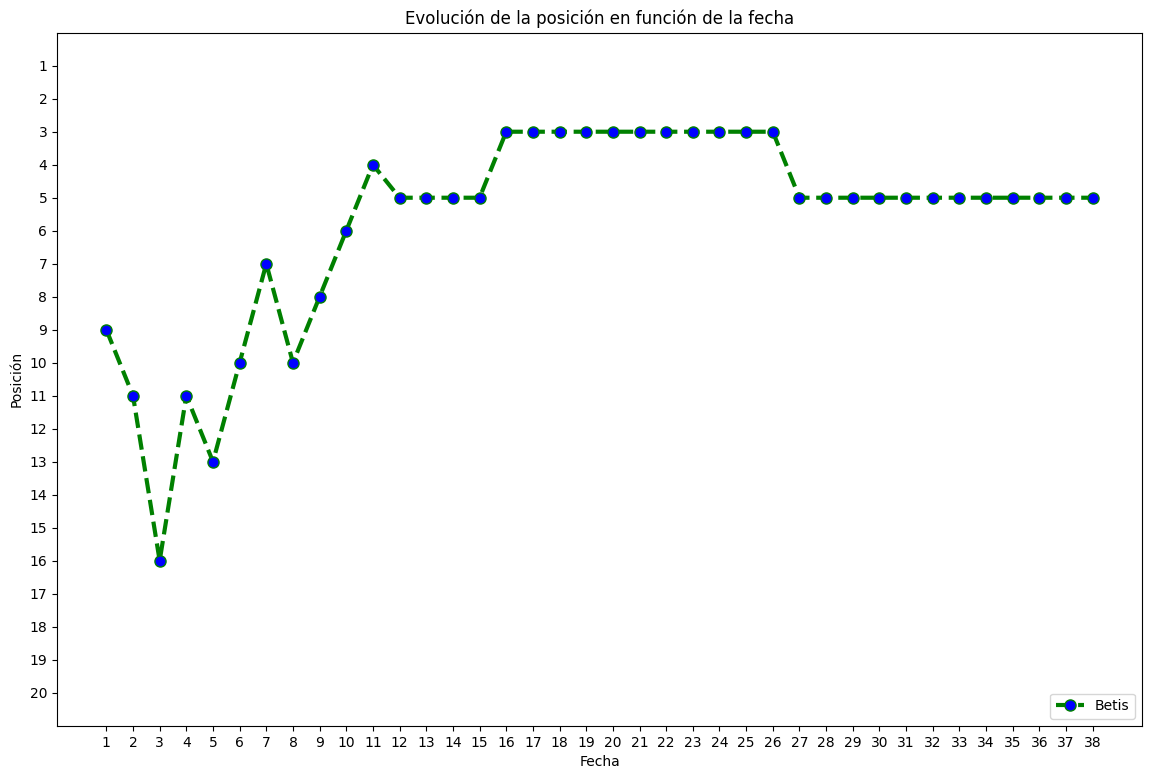

In [24]:
fig,ax = plt.subplots(figsize=(14, 9))

ax.plot(fechas[:fecha], posiciones, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8, label = equipo)
ax.set_title('Evolución de la posición en función de la fecha')
ax.set_ylabel('Posición')
ax.set_xlabel('Fecha')
plt.legend()
plt.ylim(0,21)
plt.xticks(range(1,fecha+1,1))
plt.yticks(range(1,21,1))
ax.invert_yaxis()
plt.legend([equipo], loc='lower right')
plt.show()